In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
indians = ["A.R._Rahman", "Aamir_Khan", "Amitabh_Bachchan", "A_P_J_Abdul_Kalam", "Kamal_Hassan", "Madhuri_Dixit", "Mahendra_Singh_Dhoni", "Preity_Zinta", "Vidya_Balan", "Virat_Kohli"]

In [3]:
# Directory names
dataset_dir = 'vgg_face_indian_dataset'
raw_images_dir = 'vgg_face_indian_dataset/raw'
face_images_dir = 'vgg_face_indian_dataset/faces'

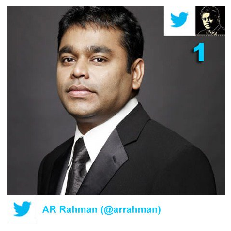

In [4]:
# Read an image in the "raw" directory
example_raw_image = cv2.imread(os.path.join(raw_images_dir, "A.R._Rahman_01.jpg"))
# Show it
plt.imshow(cv2.cvtColor(example_raw_image, cv2.COLOR_BGR2RGB)) # Ignore "cv2.COLOR_BGR2RGB"
plt.axis("off")
plt.show()

In [5]:
# Read all images in the "faces" directory
images = []
for indian in indians:
    images.append([])
    # The code inside the loop constructs the filename as Name_nn.jpg for each name
    # nn running from 01 to 20
    for i in range(1, 21):
        filenum = "_{0:02d}".format(i)
        filename = face_images_dir + "/" + indian + filenum + ".jpg"
        images[-1].append(cv2.imread(filename, 0))

In [6]:
# Finding the length of (or, number of elements in) "images", and the type of data each of those elements is
print(len(images), type(images[0]))

10 <class 'list'>


In [7]:
# Finding the length of each list in "images"
print(len(images[0]), type(images[0][0]))
print(len(images[1]), type(images[1][0]))
print(len(images[2]), type(images[2][0]))
print(len(images[3]), type(images[3][0]))
print(len(images[4]), type(images[4][0]))
print(len(images[5]), type(images[5][0]))
print(len(images[6]), type(images[6][0]))
print(len(images[7]), type(images[7][0]))
print(len(images[8]), type(images[8][0]))
print(len(images[9]), type(images[9][0]))

20 <class 'numpy.ndarray'>
20 <class 'numpy.ndarray'>
20 <class 'numpy.ndarray'>
20 <class 'numpy.ndarray'>
20 <class 'numpy.ndarray'>
20 <class 'numpy.ndarray'>
20 <class 'numpy.ndarray'>
20 <class 'numpy.ndarray'>
20 <class 'numpy.ndarray'>
20 <class 'numpy.ndarray'>


In [8]:
ar_rahman_index = 0
print(images[ar_rahman_index][0].shape, images[ar_rahman_index][1].shape)

(124, 124) (214, 214)


In [10]:
# Number of images in training set per celebrity
number_of_images_per_class_in_train = 12

# Number of images in validation set per celebrity
number_of_images_per_class_in_val = 4

# Number of images in test set per celebrity
number_of_images_per_class_in_test = 4

In [11]:
# Make the train, val, and test sets
images_train = []
images_val = []
images_test = []

# For each celebrity
for i, indian in enumerate(indians):
    
    # Add a new empty list item
    images_train.append([])
    images_val.append([])
    images_test.append([])
    
    # Add the specified number of images to the train set
    for train_iter in range(0, int(number_of_images_per_class_in_train)):
        images_train[-1].append(images[i][train_iter])
    
    # Add the specified number of images to the val set
    for val_iter in range(int(number_of_images_per_class_in_train),
                          int(number_of_images_per_class_in_train + number_of_images_per_class_in_val)):
        images_val[-1].append(images[i][val_iter])
    
    # Add the specified number of images to the test set
    for test_iter in range(int(number_of_images_per_class_in_train + number_of_images_per_class_in_val),
                           int(number_of_images_per_class_in_train + number_of_images_per_class_in_val + number_of_images_per_class_in_test)):
        images_test[-1].append(images[i][test_iter])
    

In [12]:
# Resize images
resized_images_train = np.zeros((10, int(number_of_images_per_class_in_train), 224, 224)) # 10 celebrities, 12 images per celebrity in "train", each image of size (224, 224)
for i in range(len(indians)):
    for j in range(int(number_of_images_per_class_in_train)):
        image = images_train[i][j]
        
        # Code to resize image
        # (Hint: look for "python3 cv2 resize")
        resized_image = cv2.resize(image, (224, 224))
        
        resized_images_train[i][j] = resized_image

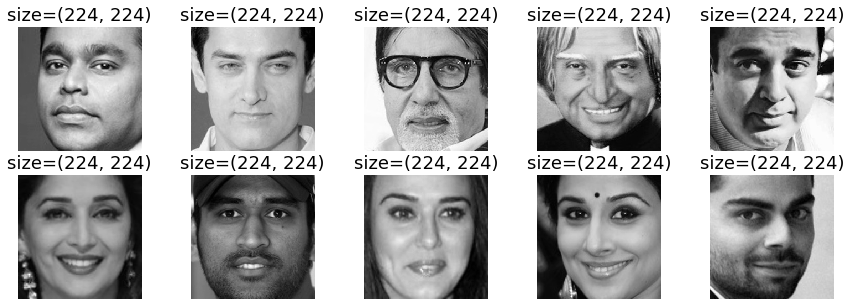

In [13]:
# Number of images to be plotted
N = 10

# Plot one image of each class
plt.figure(figsize=(15, 5))

# For each class
for i, indian in enumerate(indians):
    
    # Make a subplot
    # Syntax - plt.subplot(number_of_rows, number_of_columns, current_image_number)
    # The 'current_image_number' starts from 1
    plt.subplot(N//5, 5, i+1)
    
    # Plot the image
    example_face_image = resized_images_train[i][0]  # Changed "images_train" to "resized_images_train"
    plt.imshow(example_face_image, cmap="gray")
    
    # Turn off axis lines
    plt.axis("off")
    
    # (Optional) Write the size of the image as a title
    plt.title("size="+str(example_face_image.shape), size=18)

plt.show()

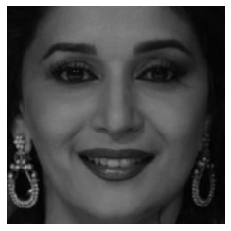

In [14]:
madhuri_dixit_index = 5
example_image = resized_images_train[madhuri_dixit_index][4]
# When displaying image using plt.imshow, we specify that the
# minimum and maximum possible values of the image are 0 and 255
# in the arguments vmin and vmax
plt.imshow(example_image, cmap='gray', vmin=0, vmax=255)
plt.axis("off")
plt.show()

In [15]:
# Printing the minimum and maximum values of the image
print(resized_images_train[madhuri_dixit_index][4].min(), resized_images_train[madhuri_dixit_index][4].max())

0.0 171.0


In [16]:
# MinMax Scaling of images
minmax_scaled_images_train = np.zeros((10, int(number_of_images_per_class_in_train), 224, 224)) # 10 celebrities, some images per celebrity, each image of size (224, 224)
for i in range(len(indians)):
    for j in range(int(number_of_images_per_class_in_train)):
        resized_image = resized_images_train[i][j]
        
        # Code to normalize image using minmax scaling
        # (Hint: Look in numpy's documentation for minimum and maximum)
        minmax_scaled_image = (resized_image - np.min(resized_image))/(np.max(resized_image) - np.min(resized_image))*255
        
        minmax_scaled_images_train[i][j] = minmax_scaled_image

In [17]:
# Printing the minimum and maximum values of the image
print(minmax_scaled_images_train[madhuri_dixit_index][4].min(), minmax_scaled_images_train[madhuri_dixit_index][4].max())

0.0 255.0


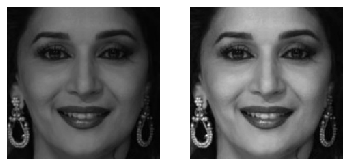

In [18]:
# Showing image before and after min-max scaling
madhuri_dixit_index = 5
plt.subplot(121)
plt.imshow(resized_images_train[madhuri_dixit_index][4], cmap='gray', vmin=0, vmax=255)
plt.axis("off")
plt.subplot(122)
plt.imshow(minmax_scaled_images_train[madhuri_dixit_index][4], cmap='gray', vmin=0, vmax=255)
plt.axis("off")
plt.show()

In [19]:
# Combining 1st and 2nd dimensions
collated_images = np.reshape(minmax_scaled_images_train, (10*int(number_of_images_per_class_in_train), 224, 224))

In [20]:
# Reshaping into n x K^2
reshaped_images = np.reshape(collated_images, (collated_images.shape[0], 224*224))

In [21]:
# Calculating mean image
mean_image = np.mean(reshaped_images, axis=0)

In [22]:
print(mean_image.shape)

(50176,)


In [23]:
# Subtracting mean image from the training images
final_images_train = reshaped_images - mean_image

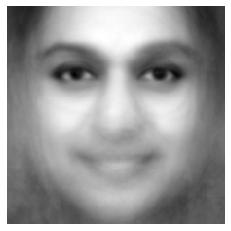

In [24]:
plt.imshow(np.reshape(mean_image, (224, 224)), cmap='gray')
plt.axis("off")
plt.show()

In [25]:
def manipulate_images(images, number_of_images_per_class, mean_image):
    
    # Manipulated images
    manipulated_images = np.zeros((10, int(number_of_images_per_class), 224, 224)) # 10 celebrities, some images per celebrity, each image of size (224, 224)
    
    for i in range(len(indians)):
        for j in range(int(number_of_images_per_class)):
            image = images[i][j]

            # Code to resize image
            # (Hint: look for "python3 cv2 resize")
            resized_image = cv2.resize(image, (224, 224))
            
            # Code to normalize image using minmax scaling
            # (Hint: Look in numpy's documentation for minimum and maximum)
            minmax_scaled_image = (resized_image - np.min(resized_image))/(np.max(resized_image) - np.min(resized_image))*255
            
            manipulated_images[i][j] = minmax_scaled_image
            
    # Combining 1st and 2nd dimensions
    collated_images = np.reshape(manipulated_images, (10*int(number_of_images_per_class), 224, 224))
    
    # Reshaping into n x K^2
    reshaped_images = np.reshape(collated_images, (collated_images.shape[0], 224*224))
    
    # Subtracting mean image from the training images
    final_images = reshaped_images - mean_image
    
    return final_images

In [26]:
# Finding final images for val and test
final_images_val = manipulate_images(images_val, number_of_images_per_class_in_val, mean_image)
final_images_test = manipulate_images(images_test, number_of_images_per_class_in_test, mean_image)

In [27]:
labels_train = np.array([[i]*number_of_images_per_class_in_train for i in range(10)]).flatten()
labels_val = np.array([[i]*number_of_images_per_class_in_val for i in range(10)]).flatten()
labels_test = np.array([[i]*number_of_images_per_class_in_test for i in range(10)]).flatten()

In [28]:
print(labels_val)

[0 0 0 0 1 1 1 1 2 2 2 2 3 3 3 3 4 4 4 4 5 5 5 5 6 6 6 6 7 7 7 7 8 8 8 8 9
 9 9 9]


In [29]:
# Save the train, val, and test data and labels, and the mean image
np.savez("data",
         data_train=final_images_train, labels_train=labels_train,
         data_val=final_images_val, labels_val=labels_val,
         data_test=final_images_test, labels_test=labels_test,
         mean_image=mean_image)

# Proceed to Part 2 ...